<a href="https://colab.research.google.com/github/min02choi/Introduction-To-HCI/blob/master/Week3/mee_eeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 19.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import mne

In [ ]:
root = mne.datasets.sample.data_path() / 'MEG' / 'sample'
raw_file = root / 'sample_audvis_filt-0-40_raw.fif'

In [ ]:
raw = mne.io.read_raw_fif(raw_file, preload=False, verbose=False)
raw.pick(['eeg', 'eog']).load_data()

events_file = root / 'sample_audvis_filt-0-40_raw-eve.fif'
events = mne.read_events(events_file)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [ ]:
raw.crop(tmax=90)
events = mne.read_events(events_file)
print(raw.info)

<Info | 15 non-empty values
 bads: 1 items (EEG 053)
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 61
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>


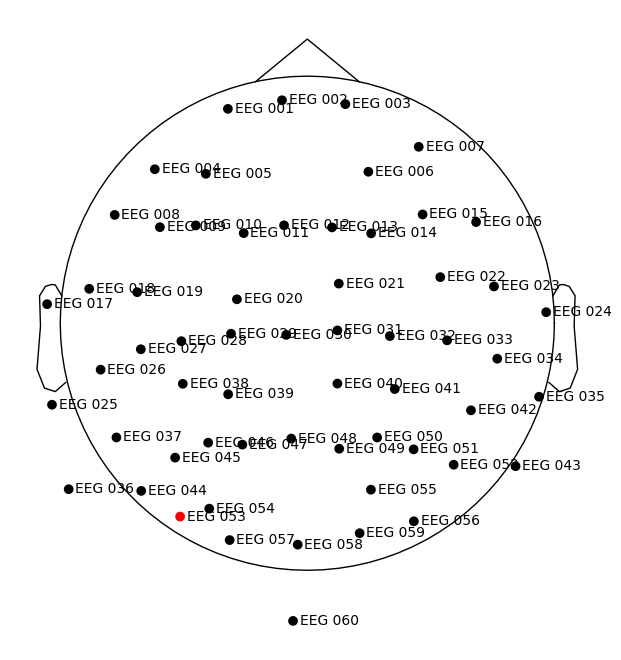

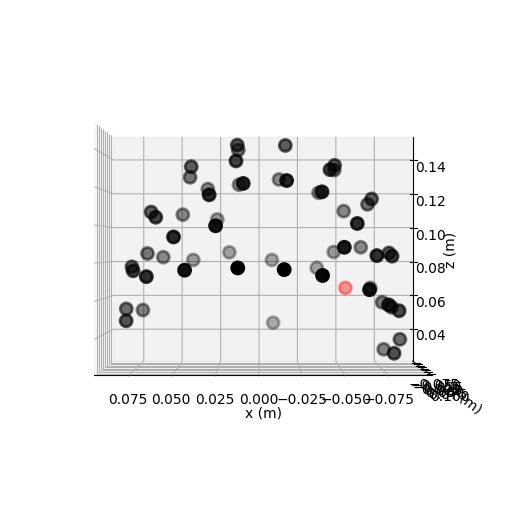

Using matplotlib as 2D backend.


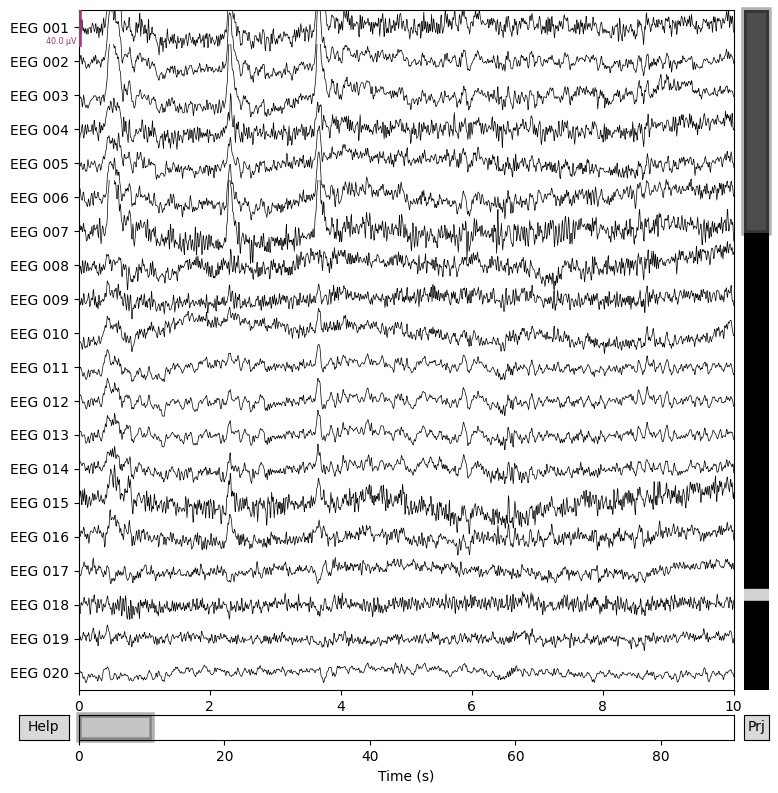

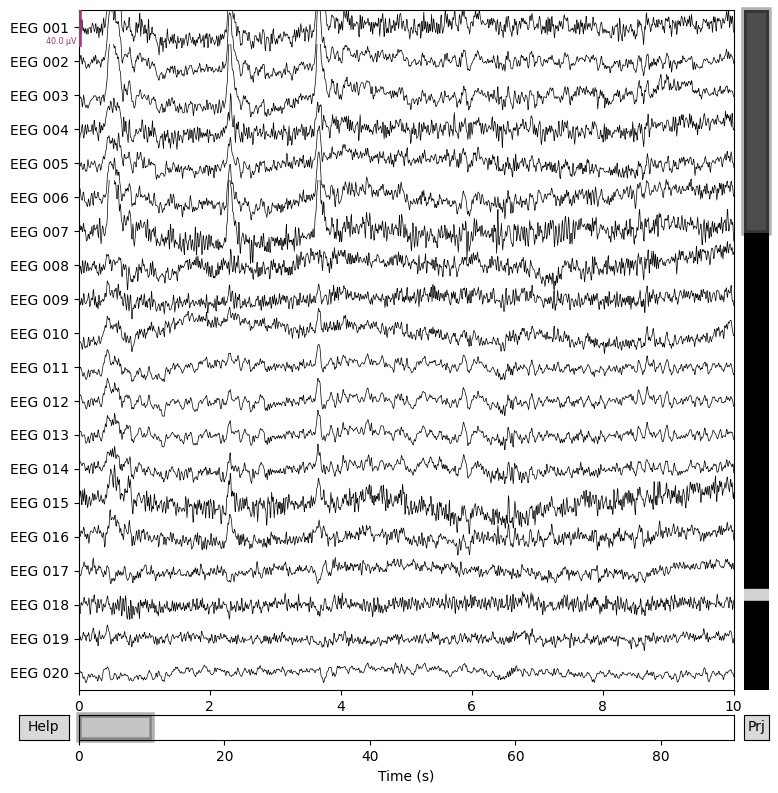

In [ ]:
channel_renaming_dict = {
    name: name.replace(' 0', '').lower() for name in raw.ch_names
}
_ = raw.plot_sensors(show_names=True)
fig = raw.plot_sensors('3d')
raw.plot()

In [ ]:
np.unique(events[:, -1])

array([ 1,  2,  3,  4,  5, 32])

In [ ]:
events_dict = {
    'auditory/left': 1,
    'auditory/right': 2,
    'visual/left': 3,
    'visual/right': 4,
    'face': 5,
    'buttonpress': 32,
}

You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


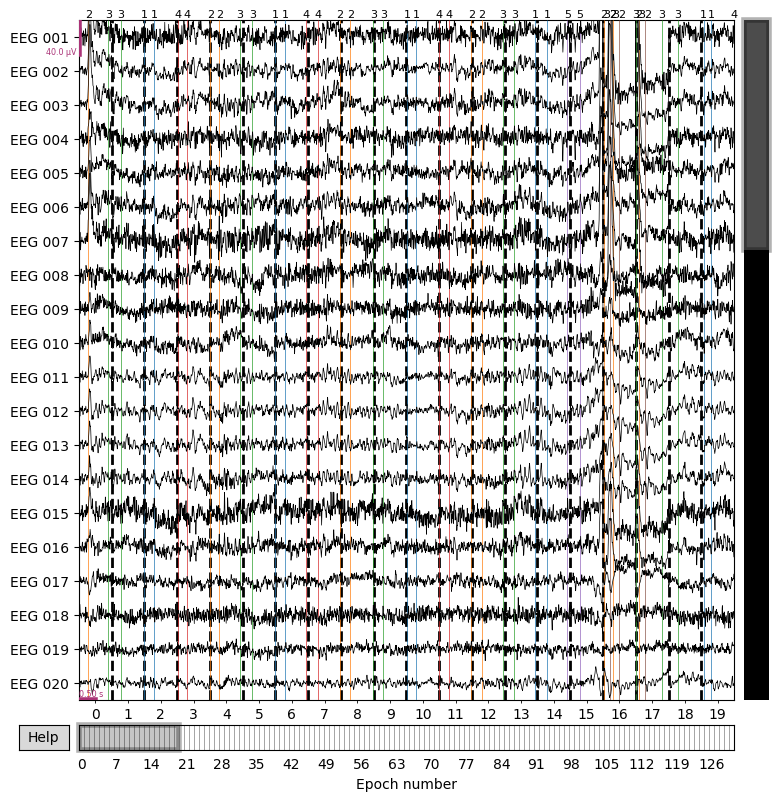

In [ ]:
epochs = mne.Epochs(raw, events, event_id=events_dict, tmin=-0.3, tmax=0.7, preload=True, verbose=False)
fig = epochs.plot(events=events)